# Time Varying Market Betas

In [1]:
from utils.models import *
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0
filterpy: 1.4.5


## ECB Non-Energy Commodity Index Beta

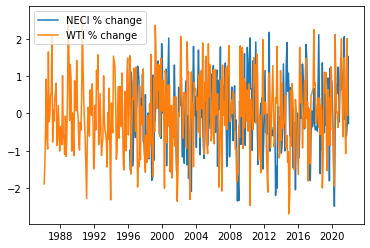

In [2]:
neci = clean_series('index', load('data/ECB_NECI.csv').pct_change().dropna())
c1 = clean_series('contract_1', load('data/WTI.csv').pct_change().dropna())
plt.plot(neci, label='NECI % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [3]:
lags = 0
x0 = np.array([1 for _ in range(lags+1)])
kalman = KF(x0, lags=lags)
kf = kalman.run('contract_1', 'index', c1.join(neci).dropna())

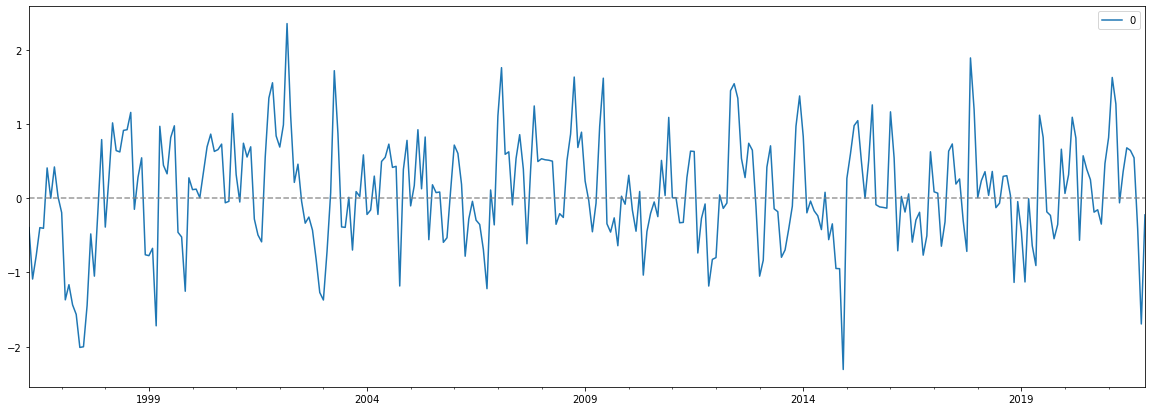

In [4]:
kf.plot(figsize=(20,7))
plt.axhline(0, linestyle='--', color='grey', alpha=0.8)

<BarContainer object of 1 artists>

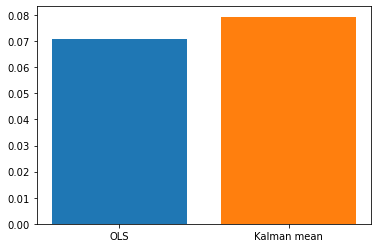

In [5]:
dl = DL('contract_1', 'index', c1.join(neci).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl.model.params))
plt.bar('Kalman mean', kf.mean())

RMSE OLS: 1.0094253641841786
RMSE Kalman: 0.6523026836273332


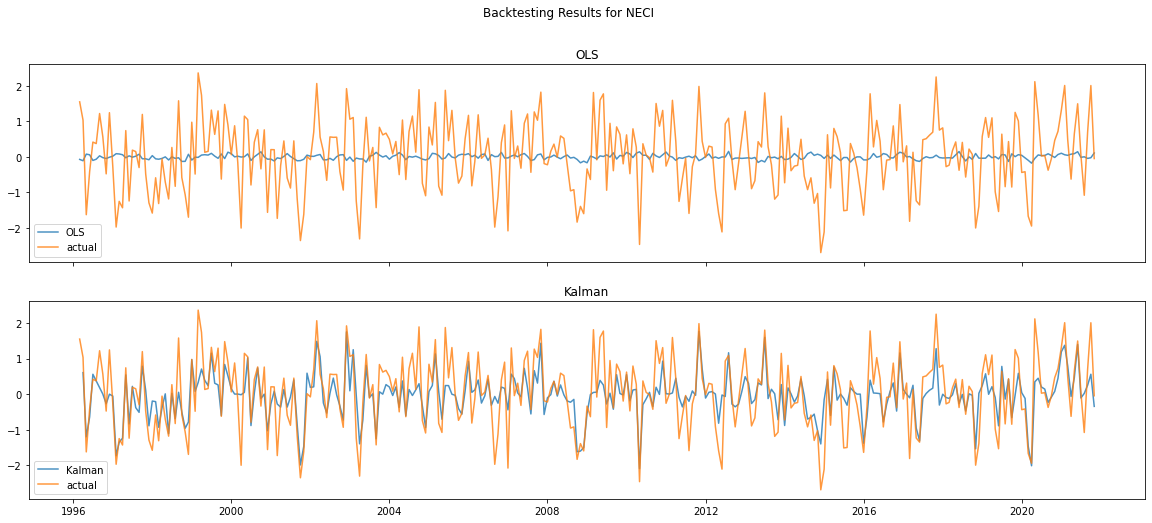

In [6]:
x = neci['index']
plot_backtests(c1.contract_1, 'NECI', {'OLS': ols_backtest(x, dl.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(neci.index))

## Real Economic Activity Beta (Killian 2009)

Already in % deviation from trend form so all we need to do is calc shocks.

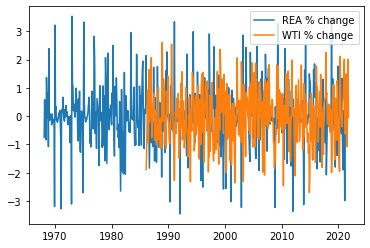

In [7]:
rea = clean_series('REA', load('data/REAGlobal.csv').pct_change().dropna())
plt.plot(rea, label='REA % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [8]:
kalman = KF(x0, lags=lags)
kf2 = kalman.run('contract_1', 'REA', c1.join(rea).dropna())

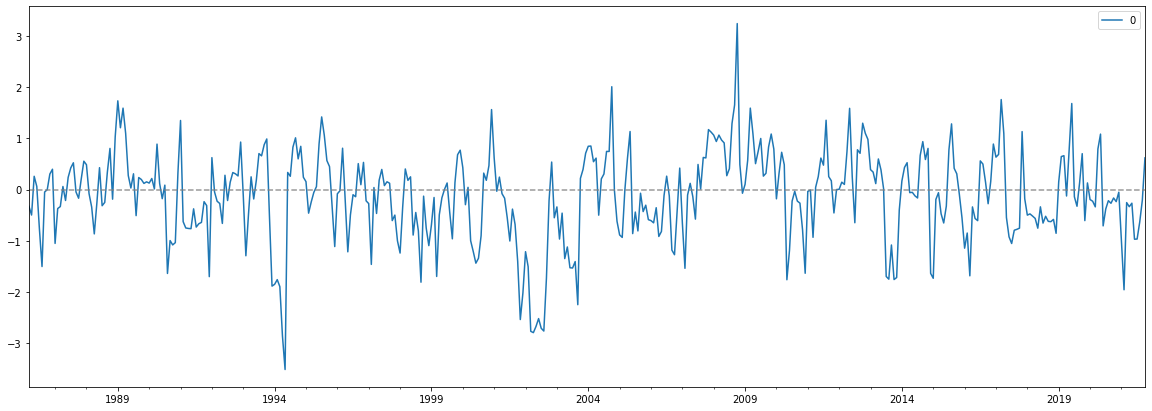

In [9]:
kf2.plot(figsize=(20,7))
plt.axhline(0, linestyle='--', color='grey', alpha=0.8)

<BarContainer object of 1 artists>

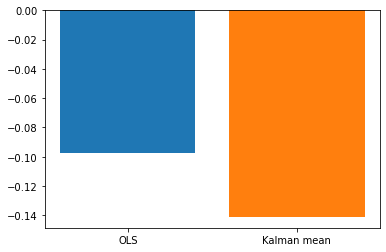

In [10]:
dl2 = DL('contract_1', 'REA', c1.join(rea).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl2.model.params))
plt.bar('Kalman mean', kf2.mean())

RMSE OLS: 0.8092740385424517
RMSE Kalman: 0.6934163115690485


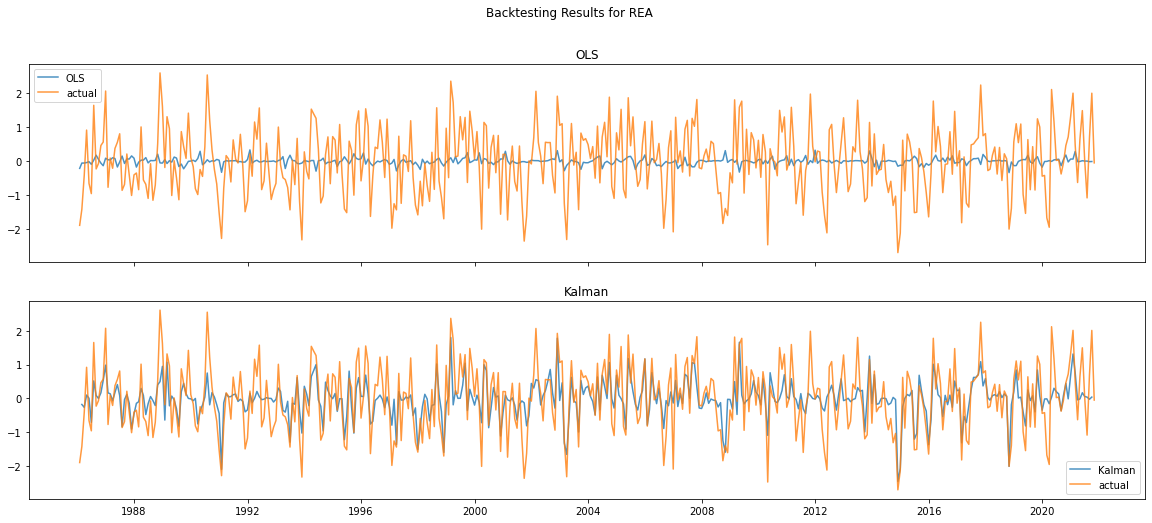

In [11]:
x = rea['REA']
plot_backtests(c1.contract_1, 'REA', {'OLS': ols_backtest(x, dl2.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(c1.index))

## Natural Gas

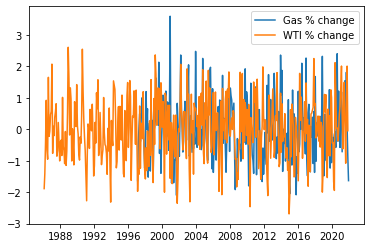

In [12]:
gas = clean_series('f_1', load('data/NGas.csv').pct_change().dropna())
plt.plot(gas, label='Gas % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [13]:
kalman = KF(x0, lags=lags)
kf3 = kalman.run('contract_1', 'f_1', c1.join(gas).dropna())

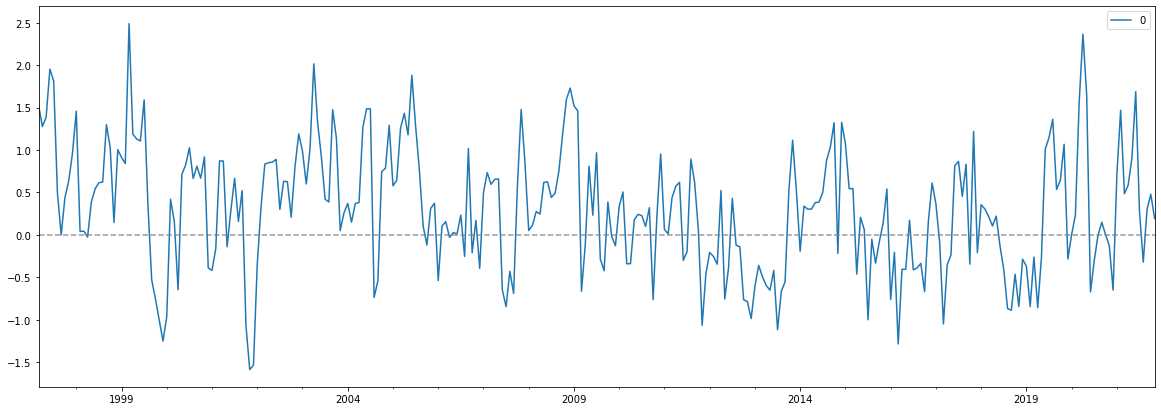

In [14]:
kf3.plot(figsize=(20,7))
plt.axhline(0, linestyle='--', color='grey', alpha=0.8)

<BarContainer object of 1 artists>

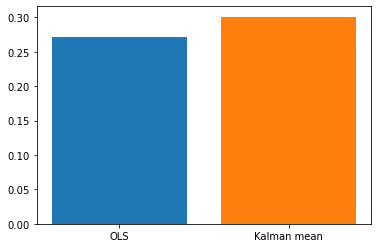

In [15]:
dl3 = DL('contract_1', 'f_1', c1.join(gas).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl3.model.params))
plt.bar('Kalman mean', kf3.mean())

RMSE OLS: 0.9789358737280823
RMSE Kalman: 0.6518274035540373


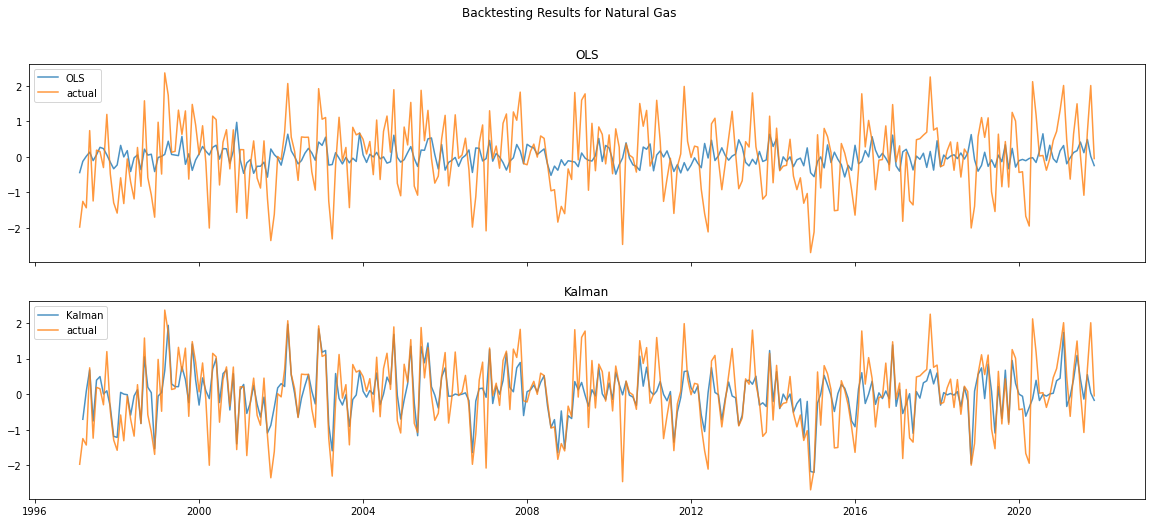

In [16]:
x = gas['f_1']
plot_backtests(c1.contract_1, 'Natural Gas', {'OLS': ols_backtest(x, dl3.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(gas.index))